<a href="https://colab.research.google.com/github/BilawalBaloch/Data-Science-ML/blob/main/linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Linear Regression**

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

**Data file(csv)**

In [20]:
data = pd.read_csv('/content/Linear Regression - Sheet1.csv')

**data**

In [21]:
data

,X,Y
0,1,3.888889
1,2,4.555556
2,3,5.222222
3,4,5.888889
4,5,6.555556
...,...,...
295,296,200.555556
296,297,201.222222
297,298,201.888889
298,299,1.888889


from matplotlib import pyplot as plt
data['X'].plot(kind='hist', bins=20, title='X')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data['Y'].plot(kind='hist', bins=20, title='Y')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='X', y='Y', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['X']
  ys = series['Y']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('X', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X')
_ = plt.ylabel('Y')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['X']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'X'}, axis=1)
              .sort_values('X', ascending=True))
  xs = counted['X']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('X', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('X')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
data['X'].plot(kind='line', figsize=(8, 4), title='X')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
data['Y'].plot(kind='line', figsize=(8, 4), title='Y')
plt.gca().spines[['top', 'right']].set_visible(False)

In [22]:
data.mean()

,0
X,150.500000
Y,102.215556


In [23]:
data.shape

(300, 2)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       300 non-null    int64  
 1   Y       300 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 4.8 KB


In [25]:
data.describe()

,X,Y
count,300.000000,300.000000
mean,150.500000,102.215556
std,86.746758,57.842711
min,1.000000,1.888889
25%,75.750000,52.388889
50%,150.500000,102.222222
75%,225.250000,152.055556
max,300.000000,201.888889


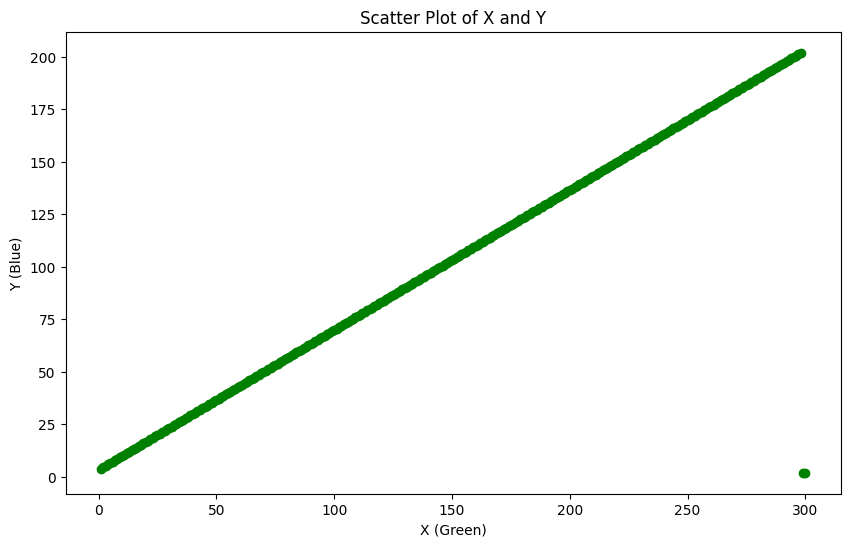

In [75]:
plt.figure(figsize=(10, 6))
plt.scatter(data['X'], data['Y'], color='green')
plt.xlabel('X (Green)')
plt.ylabel('Y (Blue)')
plt.title('Scatter Plot of X and Y')
plt.show()

In [39]:
X = data[['X']]

In [40]:
Y = data['Y']

**Data in Train Test formate**

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, train_size=0.3, random_state=229)

**Model**

In [42]:
model = LinearRegression()

**Model fitting**

In [43]:
model.fit(X_train,Y_train)


LinearRegression()

In [44]:
model.intercept_

np.float64(8.511675119916092)

In [46]:
model.coef_

array([0.60852943])

**Y_predicion**

In [49]:
y_pred = model.predict(X_test)

In [50]:
y_pred

array([139.34550271,  57.802559  , 191.07050432, 109.52756061,
       172.20609197,  28.59314633, 135.0857967 ,  21.29079316,
        51.10873527, 124.13226694, 106.48491346,  52.93432356,
       184.98521001, 118.04697264, 183.15962172, 104.65932516,
       149.69050303,  33.46138178, 110.74461947,  77.88403021,
       178.29138627, 107.70197232, 112.57020776, 161.86109165,
       180.725504  ,  90.05461883, 113.78726662, 173.42315083,
       130.82609068,  72.40726534,  99.79108972,  26.15902861,
        63.27932388, 146.03932645,  84.57785395,  51.7172647 ,
       116.82991378,  48.06608811, 102.83373687, 142.38814986,
       175.24873912,  45.02344096,  55.36844128,  87.62050111,
       117.43844321, 189.24491602, 168.55491538, 156.38432677,
        98.57403086, 115.61285492,  60.23667673, 164.29520937,
       189.85344546, 140.56256157,  81.5352068 , 153.34167962,
       113.17873719, 149.0819736 , 119.87256093, 184.37668058,
       170.98903311,  71.19020648,  35.28697007,  56.58

In [51]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

In [57]:
mean_absolute_error,(Y_test, y_pred),

(<function sklearn.metrics._regression.mean_absolute_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average')>,
 (214    146.555556
  80      57.222222
  299      1.888889
  165    113.888889
  268    182.555556
            ...    
  184    126.555556
  258    175.888889
  79      56.555556
  197    135.222222
  19      16.555556
  Name: Y, Length: 210, dtype: float64,
  array([139.34550271,  57.802559  , 191.07050432, 109.52756061,
         172.20609197,  28.59314633, 135.0857967 ,  21.29079316,
          51.10873527, 124.13226694, 106.48491346,  52.93432356,
         184.98521001, 118.04697264, 183.15962172, 104.65932516,
         149.69050303,  33.46138178, 110.74461947,  77.88403021,
         178.29138627, 107.70197232, 112.57020776, 161.86109165,
         180.725504  ,  90.05461883, 113.78726662, 173.42315083,
         130.82609068,  72.40726534,  99.79108972,  26.15902861,
          63.27932388, 146.03932645,  84.57785395,  51.7172647 ,
         116.82991378,  

In [58]:
mean_absolute_percentage_error(Y_test, y_pred)

0.5609047979565467

In [59]:
mean_squared_error(Y_test, y_pred)

211.4853089893186